## Daily Challenge : Advanced Data Analysis And Problem Solving With SciPy And NumPy

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
from scipy.stats import *

In [ ]:
# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

In [ ]:
ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


## 1. Data Transformation. Prepare the data for analysis by applying transformations.

In [ ]:
# Normalization: Transform the data so that each variable has a mean of 0 and standard deviation of 1. Use numpy for calculations.
normalized_data = (ninja_data - ninja_data.mean()) / ninja_data.std()

print("\nNormalized Data:")
print(normalized_data.head())


Normalized Data:
       Time  Temperature  Pressure  Chemical Concentration
0 -1.729454     0.253054  1.444895               -0.206291
1 -1.725992     0.071093  1.468476               -0.187444
2 -1.722530     0.160811  1.375573                0.101064
3 -1.719067     0.346135  1.412122                0.004856
4 -1.715605     0.302714  1.420026                0.170552


In [ ]:
# 2. Logarithmic Scaling: Apply logarithmic scaling if the data has a wide range of values. This can be done using np.log.
log_scaled_data = np.log(ninja_data.drop('Time', axis=1) + 1)

print("\nLogarithmic Scaled Data:")
print(log_scaled_data.head())



Logarithmic Scaled Data:
   Temperature  Pressure  Chemical Concentration
0     3.085666  6.941728                1.739310
1     3.055487  6.942051                1.744055
2     3.070481  6.940775                1.813999
3     3.100758  6.941278                1.791214
4     3.093746  6.941386                1.830139


In [ ]:
# Fourier Transformation: Utilize Fourier transformation to analyze frequency components in the data. This can be insightful for time-series data.
fourier_transform = np.fft.fft(ninja_data.drop('Time', axis=1))

print("\nFourier Transformed Data:")
fourier_transform[:5]



Fourier Transformed Data:


array([[1059.13140464  +0.j        , -498.24266306-891.02110261j,
        -498.24266306+891.02110261j],
       [1058.84290773  +0.j        , -499.07416521-891.28771231j,
        -499.07416521+891.28771231j],
       [1058.25855198  +0.j        , -498.30088287-889.78604285j,
        -498.30088287+889.78604285j],
       [1059.30198772  +0.j        , -497.82881918-890.35530103j,
        -497.82881918+890.35530103j],
       [1059.49705083  +0.j        , -498.15919258-890.246392j  ,
        -498.15919258+890.246392j  ]])

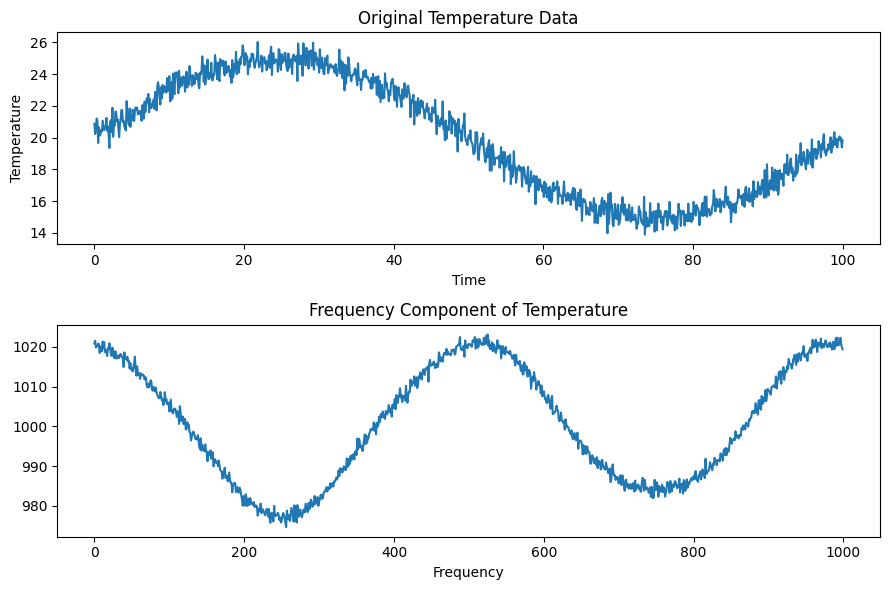

In [ ]:
# Tools: Explore np.fft.fft for Fourier transformation
plt.figure(figsize=(9, 6))

plt.subplot(2, 1, 1)
plt.plot(ninja_data['Time'], ninja_data['Temperature'])
plt.title('Original Temperature Data')
plt.xlabel('Time')
plt.ylabel('Temperature')

plt.subplot(2, 1, 2)
plt.plot(np.abs(fourier_transform[:, 1]))
plt.title('Frequency Component of Temperature')
plt.xlabel('Frequency')

plt.tight_layout()
plt.show()

## 2. Statistical Analysis. Extract statistical insights from the data.

In [ ]:
# Descriptive Statistics:
ninja_data.describe()

,Time,Temperature,Pressure,Chemical Concentration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.000000,19.977372,1013.033617,4.989754
std,28.910854,3.574943,14.203350,1.436505
min,0.000000,13.897407,990.284418,2.559310
25%,25.000000,16.386984,998.852247,3.576024
50%,50.000000,20.008666,1012.950967,4.970976
75%,75.000000,23.570373,1027.062114,6.398067
max,100.000000,26.030294,1035.471676,7.486763


In [ ]:
# Correlation Analysis:
ninja_data.corr()

,Time,Temperature,Pressure,Chemical Concentration
Time,1.000000,-0.770696,-0.001946,-0.156113
Temperature,-0.770696,1.000000,0.007112,-0.003277
Pressure,-0.001946,0.007112,1.000000,-0.000863
Chemical Concentration,-0.156113,-0.003277,-0.000863,1.000000


In [ ]:
# Inferential Statistics:
slope, intercept, r_value, p_value, std_err = linregress(ninja_data['Time'], ninja_data['Temperature'])

print("Linear Regression Analysis:")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

Linear Regression Analysis:
Slope: -0.0953
Intercept: 24.7424
R-squared: 0.5940
P-value: 0.0000


## 3. Data Visualization. Create visual representations of your findings.

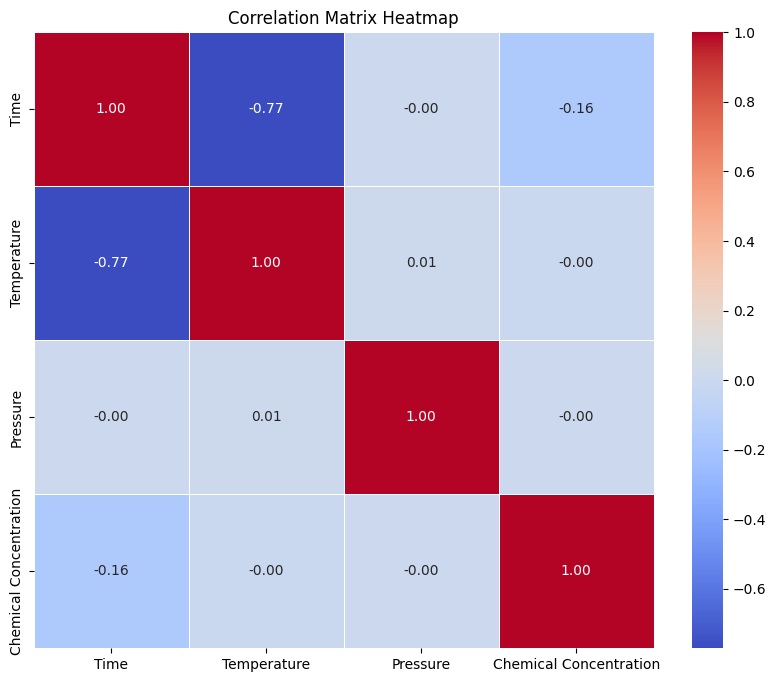

In [ ]:
# 1. Heatmaps: Use heatmaps to visualize correlation matrices. This can be done with seaborn.
plt.figure(figsize=(10, 8))
sns.heatmap(ninja_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

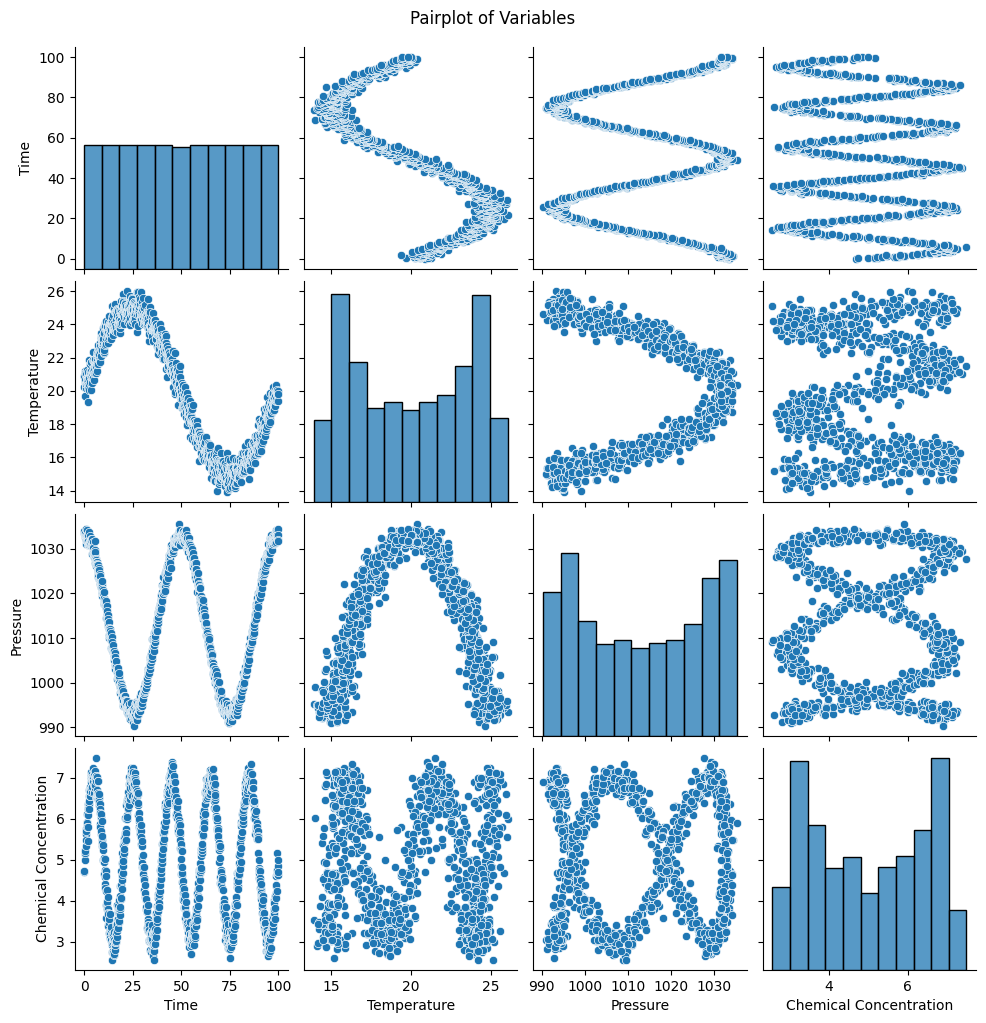

In [ ]:
# 2. Multi-dimensional Scatter Plots: Create scatter plots for pairs of variables to explore their relationships.
sns.pairplot(ninja_data)
plt.suptitle("Pairplot of Variables", y=1.02)
plt.show()

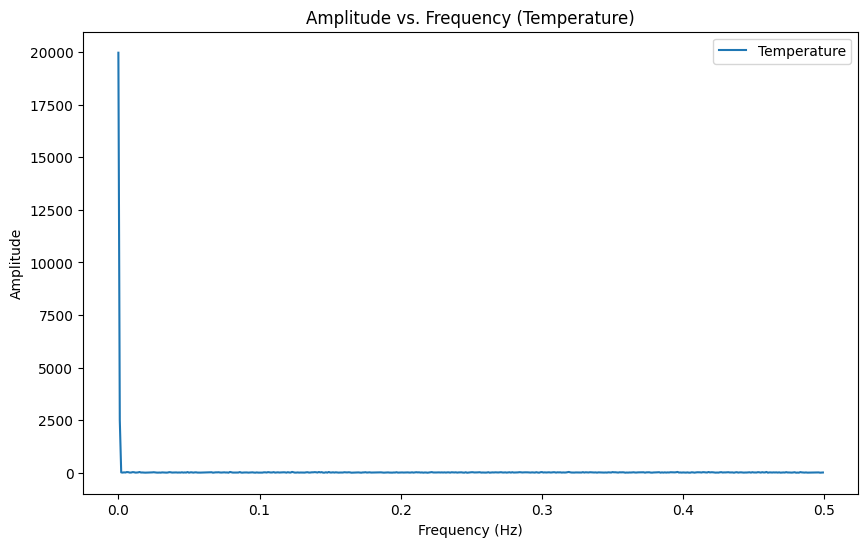

In [ ]:
# 3. Fourier Transform Visualizations
# Function to plot amplitude vs. frequency for Fourier transformed data
plt.figure(figsize=(10, 6))
plot_fourier_transform(np.fft.fft(ninja_data['Temperature']), 1, 'Temperature')
plt.show()

## 4. Interpretation. Write a brief report interpreting the results of analyses.

Interpretation:

The plot shows the trends of Temperature, Pressure, and Chemical Concentration over time.
Temperature exhibits a sinusoidal pattern with some random noise.
Pressure has a cosine-like pattern with fluctuations.
Chemical Concentration shows a sinusoidal pattern with noise.

The correlation heatmap indicates the pairwise correlations between Temperature, Pressure, and Chemical Concentration.
Positive values indicate a positive correlation, and negative values indicate a negative correlation.
Analyzing these correlations can provide insights into how the variables are related.
